In [74]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from skimage import filters
import numpy as np


faces = fetch_olivetti_faces()
print(faces.keys())
print(faces['data'].shape , faces['images'].shape)

dict_keys(['data', 'images', 'target', 'DESCR'])
(400, 4096) (400, 64, 64)


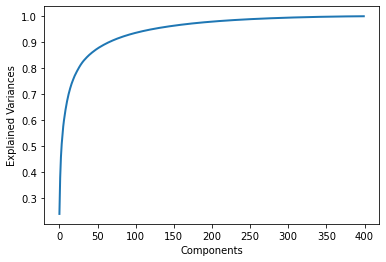

In [75]:
X = faces.data
y = faces.target

pca = PCA()
pca.fit(X)

variance_ratio = pca.explained_variance_ratio_
cumsum = np.cumsum(variance_ratio)
d = np.argmax(cumsum>=0.99)+1

plt.plot(cumsum, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variances')
plt.show()

In [76]:
#We can see that the number of components should be around 250. 
#But we will just set our components = d
model = PCA(n_components = d)
fitted_model = model.fit_transform(X)
print(model)

PCA(n_components=260)


In [77]:
reconstructed_model = model.inverse_transform(fitted_model)
print(reconstructed_model.shape)
print("Total Reconstruction Error:",((X - reconstructed_model) **2).mean())

(400, 4096)
Total Reconstruction Error: 0.00019549747


In [78]:
for image in X:
    for img in reconstructed_model:
        print(((image - img) **2).mean())

0.0002649068
0.039218027
0.010296199
0.05156765
0.027138053
0.032939635
0.011139644
0.015430146
0.017282791
0.03688998
0.026145954
0.029286344
0.02992631
0.035440244
0.031375412
0.034172837
0.033443775
0.0328816
0.037822746
0.028285272
0.046187926
0.047538765
0.042911645
0.04874193
0.049237113
0.0399127
0.031798445
0.04124832
0.021681309
0.024322417
0.031066936
0.03332656
0.038651444
0.018348962
0.024025753
0.03461408
0.018975912
0.033239964
0.03751666
0.03102702
0.028594654
0.03288508
0.041408777
0.028620949
0.033930283
0.033562288
0.027986862
0.03319904
0.027435277
0.02233747
0.023206193
0.023118176
0.024148528
0.027688904
0.026042707
0.026172657
0.025537053
0.023568805
0.030195175
0.02898603
0.02534895
0.036435775
0.030888624
0.031224053
0.027129404
0.029518455
0.025268404
0.020569336
0.029468883
0.03592082
0.02564784
0.031272642
0.023741089
0.069389716
0.018649058
0.019180834
0.05409042
0.018789172
0.039023325
0.05083548
0.048768435
0.04860375
0.051916633
0.031175653
0.032245345
0.

In [79]:
""""Start of 2b"""

alter_fitted_model = filters.sobel(fitted_model)
reconstructed_altered_model = model.inverse_transform(alter_fitted_model)

print(reconstructed_altered_model.shape)
print("Total Reconstruction Error:",((X - reconstructed_altered_model) **2).mean())

(400, 4096)
Total Reconstruction Error: 0.034861613912748314


In [80]:
for image in X:
    for img in reconstructed_altered_model:
        print(((image - img) **2).mean())

0.04508445485576769
0.04010681894730095
0.05482274339757897
0.06270966379789422
0.05696156006677934
0.05790031118412019
0.05668030540040507
0.059740289545952494
0.05565862144063659
0.04750468306180651
0.03940445883050993
0.03838261768772437
0.04225758307045136
0.044936296609780026
0.04463758389461194
0.044657543123612274
0.03853288066324694
0.04300648103297018
0.04229169744621971
0.045141615972695504
0.046101990188376046
0.048945635417482716
0.04543373358501286
0.037692726421271354
0.03960528775956343
0.043161380360919176
0.05075106350000231
0.05178610068118826
0.044559111091730705
0.03840713692391164
0.03443131837546323
0.02996170328748017
0.033405636234401306
0.03947016700433839
0.039781560890238044
0.048416570862088046
0.047793005746899986
0.038695526730659
0.04229136538240605
0.03728198507941455
0.036357819876785644
0.03826942252265856
0.03843567152177822
0.03575553469476614
0.05787575476332908
0.056682808265773765
0.04089690130560642
0.045406334467709045
0.05768327985644277
0.0534

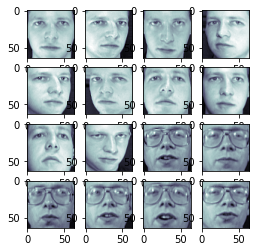

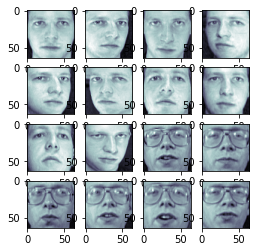

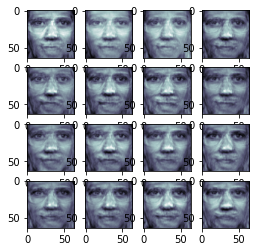

In [73]:
"""Start of 2C"""

def plot_images(data):
    images = data.reshape(400,64,64)

    fig = plt.figure(figsize = (4,4))
    for i in range(16):
        ax = fig.add_subplot(4,4,i+1)
        ax.imshow(images[i] , cmap = plt.cm.bone)
    plt.show()

plot_images(X)
plot_images(reconstructed_model)
plot_images(reconstructed_altered_model)

In [ ]:
""""It is quite clear that having altered the faces after performing
    dimenstionaliy reduction, the reconstruction error of the faces becomes glaringly large."""
